# Trabalho 3

### Alunos: João Victor Soares Silva - 20210027300
###         Jonas Felipe da Fonseca Oliveira - 20210026948
### Disciplina: Teoria dos Grafos Aplicada

In [1]:
from auxx import *
from graph import *
import random as rd
import matplotlib.pyplot as plt

In [2]:
G = graph.from_a_file("graph_type2_2")

# Algoritmo de Karger

In [3]:
def karger_alg(G : graph):
    vert = list(range(G.vec_num))
    edges = G.edges_list
    # vertex_dict = {}
    while(len(vert) != 2):
        
        choice = rd.choice(edges)

        new_vert = max(vert)+1 #cria novo vertice
        vert.append(new_vert) #adiciona ao vertices

        # remove os vertices concatenados
        vert.remove(choice[0]) 
        vert.remove(choice[1])
        
        new_edges = [] #Criando uma lista de novas arestas
        # vertex_dict[new_vert] = (choice) #criando um dicionario com a representação dos vertices

        for e in edges: #percorrendo cada vertice antigo
            if sorted(e) == sorted(choice): #não adiciona as arestas concatenadas
                continue

            #muda o valor dos antigos vertices para o novo vertice
            elif choice[0] == e[0] or choice[1] == e[0]:
                new_edges.append((new_vert,e[1]))

            elif choice[0] == e[1] or choice [1] == e[1]:
                new_edges.append((e[0], new_vert))

            #mantem as arrestas de outros vertices
            else:
                new_edges.append(e)
        edges = new_edges
    
    
    return len(edges)

In [4]:
def karger(G : graph, vol : int):
    results_list = []

    for i in range(vol):
        results_list.append(karger_alg(G))
    
    return min(results_list) #retorno minimo

# Algoritmo Ingênuo

In [5]:
def naive_alg (G : graph):
    vertices = []
    visited_list = []
    blue_list = []
    red_list = []
    min_cut = 0

    for i in range (G.vec_num): #gerando a lista dos vértices
        vertices.append(i)

    while (len(vertices) > 0):
        choice = rd.choice(vertices)

        if (len(blue_list) <= len(red_list)):
            blue_list.append(choice)

            for k in red_list:
                if G.are_neigh(choice + 1, k + 1):
                    if sorted([choice, k]) not in visited_list:
                        visited_list.append(sorted([choice, k]))
                        min_cut = min_cut + 1
        
        else:
            red_list.append(choice)

            for k in blue_list:                
                if G.are_neigh(choice + 1, k + 1):
                    if sorted([choice, k]) not in visited_list:
                        visited_list.append(sorted([choice, k]))
                        min_cut = min_cut + 1
        
        vertices.remove(choice)
    
    return min_cut

In [6]:
def naive (G : graph, iter_ : int):
    results_list = []

    for i in range (iter_):
        results_list.append(naive_alg(G))

    return min(results_list) #Mínimo

# Função Descompact

In [7]:
def descompact(tuple_):
    vert, vertex_dict = tuple_
    blue_list = []
    red_list = []

    blue_list.append(vert[0])
    red_list.append(vert[1])

    print(blue_list)

    aux = []

    while(len(vertex_dict.keys())):
        print(len(vertex_dict.keys()))
        print(vertex_dict.keys())

        for v in blue_list:
            if v not in vertex_dict.keys():
                print(v, "eita blue")
                break

            blue_list.append(vertex_dict[v][0])
            blue_list.append(vertex_dict[v][1])
            blue_list.remove(v)
            del vertex_dict[v]
            print(vertex_dict[v])
        

        for v in red_list:
            if v not in vertex_dict.keys():
                print(v, "eita red")
                print(vertex_dict[v])
                break

            red_list.append(vertex_dict[v][0])
            red_list.append(vertex_dict[v][1])
            red_list.remove(v)
            del vertex_dict[v]
        
    
    return red_list, blue_list

# Probabilidade e Gráfico

In [15]:
def P_Karger_and_Naive (G : graph, exec : int, iter : int, step : int, min_ : int, tol : int, max_iter : int):
    p = 0
    x_iter = []
    y_k_prob = []
    y_n_prob = []

    while (p <= tol):
        p = 0
        count_min_k = 0 #conta os cortes mínimos do algoritmo de karger
        count_min_n = 0 #conta os cortes mínimos do algoritmo ingênuo

        for i in range (exec):
            k = karger (G, iter)
            n = naive (G, iter)
            
            if k == min_:
                count_min_k += 1
            if n == min_:
                count_min_n += 1
                
        prob_k = count_min_k / exec
        prob_n = count_min_n / exec

        x_iter.append(iter)
        y_k_prob.append(prob_k)
        y_n_prob.append(prob_n)
        
        iter += step
        if iter >= max_iter:
            break
    
    return x_iter, y_k_prob, y_n_prob

In [16]:
x, y_k, y_n = P_Karger_and_Naive(G = G, exec = 10000, iter = 5, step = 10, min_ = 5, tol = 0.995, max_iter = 50)

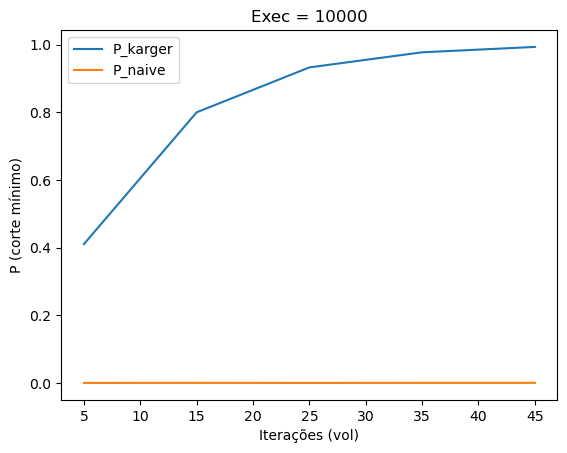

In [17]:
plt.plot()
plt.plot(x, y_k, label = "P_karger")
plt.plot(x, y_n, label = "P_naive")
plt.title("Exec = 10000")
plt.xlabel("Iterações (vol)")
plt.ylabel("P (corte mínimo)")
plt.legend()
plt.show()